<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Matin Mirzababaei

**Student ID**: 400102114





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:

class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features,))
        self.bias = 0

    def _compute_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def _compute_gradient(self, X, y, y_pred):
        num_samples = X.shape[0]

        y_pred = y_pred.reshape((num_samples,))

        dw = 1 / num_samples * np.dot(X.T, (y_pred - y))
        db = 1 / num_samples * np.sum(y_pred - y)

        return dw, db

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self._initialize_parameters(num_features)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            dw, db = self._compute_gradient(X, y, y_pred)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return y_pred

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        y_pred_class = (y_pred >= 0.5).astype(int)

        accuracy = np.mean(y_pred_class == y)
        precision = np.sum((y_pred_class == 1) & (y == 1)) / np.sum(y_pred_class == 1)
        recall = np.sum((y_pred_class == 1) & (y == 1)) / np.sum(y == 1)
        f1_score = 2 * precision * recall / (precision + recall)

        return accuracy, precision, recall, f1_score



**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
# Load data
data = pd.read_csv(r"Logistic_question.csv")

# Split features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Target
0,47,11.8,4,4.5,4.5,9.65,1,0.92
1,34,10.7,4,4.0,4.5,8.87,1,0.76
2,26,10.4,3,3.0,3.5,8.00,1,0.72
3,32,11.0,3,3.5,2.5,8.67,1,0.80
4,24,10.3,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,34,11.0,3,3.5,3.5,9.04,1,0.82
396,35,10.7,3,3.0,3.5,9.11,1,0.84
397,40,11.6,4,5.0,4.5,9.45,1,0.91
398,22,10.3,3,3.5,4.0,8.78,0,0.67


In [ ]:
# Convert target to binary
y_binary = (y >= 0.5).astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


# Normalize data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# Your code goes here!


# Initialize and train the model
model = MyLogisticRegression()
model.fit(X_train_normalized, y_train)

# Evaluate the model
accuracy, precision, recall, f1_score = model.evaluate(X_test_normalized, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)



Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333


Evaluation Metrics:

1. Accuracy: Accuracy measures the proportion of correctly classified instances out of all instances. It's useful when the classes are balanced and equally important.

Usefulness: Accuracy is commonly used when classes are balanced and equally important. It provides a general overview of the model's performance across all classes. However, accuracy might not be suitable for imbalanced datasets, where one class dominates the other(s), as it can be misleading.

2. Precision: Precision measures the proportion of true positive predictions out of all positive predictions. It's useful when the cost of false positives is high.

Usefulness: Precision is valuable when the cost of false positives is high. For example, in medical diagnosis, precision indicates the accuracy of positive predictions, which is crucial when a false positive result might lead to unnecessary treatments or interventions.

3. Recall: Recall measures the proportion of true positive predictions out of all actual positives. It's useful when the cost of false negatives is high.

Usefulness: Recall is important when the cost of false negatives is high. For instance, in spam email detection, recall indicates the ability of the model to correctly identify spam emails, which is crucial to prevent missing important emails (false negatives).

4. F1 Score: F1 Score is the harmonic mean of precision and recall. It's useful when you want to balance between precision and recall, especially when classes are imbalanced.

Usefulness: F1 Score provides a balance between precision and recall, making it suitable for situations where there is an uneven class distribution (imbalanced datasets). It is particularly useful when both false positives and false negatives have significant consequences, and there is a need to optimize both precision and recall simultaneously.

**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
# Your code goes here!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train_normalized, y_train)

y_pred = model.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.9375
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?



**Your answer:**

- Performance:

Accuracy: The built-in model achieved a slightly higher accuracy of 0.9375 compared to 0.875 achieved by the custom implementation. This indicates that the scikit-learn implementation performed better in terms of overall classification accuracy on the test set.

Precision: Both models achieved similar precision scores, with the built-in model having a precision of 0.9333 compared to 0.875 of the custom implementation. Precision measures the proportion of true positive predictions out of all positive predictions.

Recall: Both models achieved perfect recall scores of 1.0, indicating that they were able to correctly identify all actual positives in the test set.

F1 Score: The F1 score, which is the harmonic mean of precision and recall, was slightly higher for the built-in model (0.9655) compared to the custom implementation (0.9333).

- Parameters:

The built-in LogisticRegression model has several parameters that can affect its performance:

penalty: Specifies the norm used in the penalization. It can be L1 or L2 regularization. Regularization helps prevent overfitting by penalizing large coefficient values.

C: Inverse of regularization strength; smaller values specify stronger regularization. Higher values of C indicate less regularization.

solver: Algorithm to use in optimization. Different solvers are suitable for different datasets and problem sizes. For example, 'liblinear' is suitable for small datasets, while 'sag' and 'saga' are faster for large datasets.

max_iter: Maximum number of iterations taken for the solvers to converge.

class_weight: Weights associated with classes. This can be useful for handling imbalanced datasets.

The performance of the built-in model can be influenced by choosing appropriate values for these parameters. Tuning these parameters through techniques like grid search or cross-validation can help optimize the model's performance for a given dataset.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
# import necessary libraries


import numpy as np

class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.num_classes = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _initialize_parameters(self, num_features, num_classes):
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))

    def _compute_loss(self, y, y_pred):
        num_samples = y.shape[0]
        return -np.sum(y * np.log(y_pred)) / num_samples

    def _compute_gradient(self, X, y, y_pred):
        num_samples = X.shape[0]
        dw = 1 / num_samples * np.dot(X.T, (y_pred - y))
        db = 1 / num_samples * np.sum(y_pred - y, axis=0, keepdims=True)
        return dw, db

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.num_classes = np.max(y) + 1
        self._initialize_parameters(num_features, self.num_classes)

        y_encoded = np.eye(self.num_classes)[y]

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._softmax(z)

            dw, db = self._compute_gradient(X, y_encoded, y_pred)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._softmax(z)
        return np.argmax(y_pred, axis=1)



**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
# Load data
data = pd.read_csv("Logistic_question.csv")


In [12]:
# Your code goes here!

accuracy_scores = []

for i in range(2, 11):
    # Quantize the Target column into i levels
    data['Target_quantized'] = pd.cut(data['Target'], i, labels=False)

    X = data.iloc[:, :-2].values
    y = data['Target_quantized'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    model = MyMultinomialLogisticRegression()
    model.fit(X_train_normalized, y_train)

    y_pred = model.predict(X_test_normalized)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"For i = {i}, Accuracy: {accuracy}")


For i = 2, Accuracy: 0.875
For i = 3, Accuracy: 0.8
For i = 4, Accuracy: 0.6375
For i = 5, Accuracy: 0.6375
For i = 6, Accuracy: 0.55
For i = 7, Accuracy: 0.4375
For i = 8, Accuracy: 0.4625
For i = 9, Accuracy: 0.3875
For i = 10, Accuracy: 0.3625


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

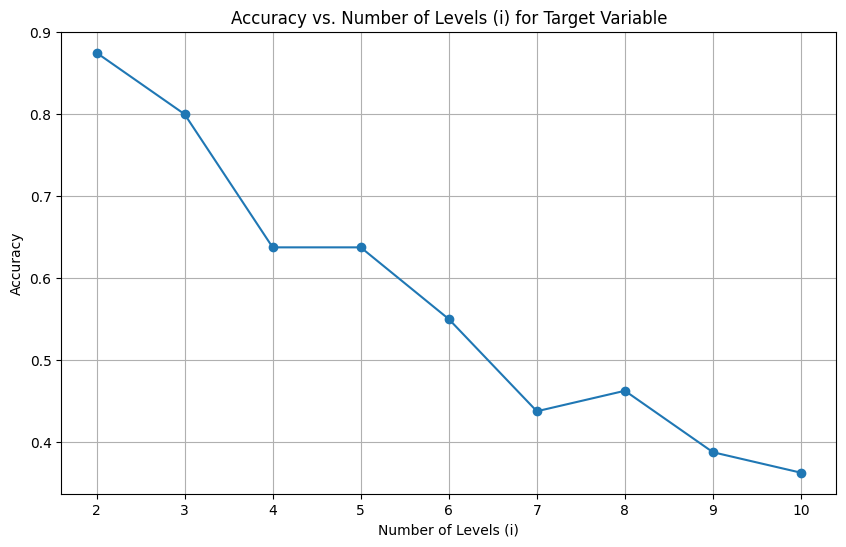

In [13]:
# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Levels (i) for Target Variable')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

**Your answer:**

Based on the reported accuracy scores for different values of $i$:

For $i = 2$, the model achieves the highest accuracy of 0.875.
As $i$ increases beyond 2, the accuracy generally decreases, indicating that the model's performance deteriorates with a higher number of levels for the target variable.
The accuracy drops notably for $i = 3$, indicating a reduction in the model's ability to accurately classify instances into multiple levels compared to binary classification ($i = 2$).
Further increasing $i$ to values beyond 3 continues to decrease accuracy, with the model struggling to distinguish between multiple levels, resulting in lower overall performance.
Based on these results, it appears that the model performs best when the target variable is quantized into 2 levels ($i = 2$), achieving the highest accuracy. This suggests that the multinomial logistic regression model is more effective in binary classification tasks rather than multiclass classification tasks with a higher number of levels.


* My model performed better!

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [14]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [15]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 98.6MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [16]:
# Your code goes here!

adult_df = pd.read_csv("adult.csv")
adult = adult_df.copy()

adult_df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
# Determine the number of null entries or fields with "?"
null_count = adult_df.isnull().sum().sum()
question_mark_count = (adult_df == "?").sum().sum()

print("Number of null entries:", null_count)
print("Number of fields with '?':", question_mark_count)

Number of null entries: 0
Number of fields with '?': 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.



**Your answer:**

In the given problem, there are 0 null entries and 6465 fields with "?" in the dataset.

Given this information, we need to decide how to handle the fields with "?" in the dataset. Here's how we can approach it:

1- Imputation:
Since there are no null entries, imputation is not applicable in this case. Imputation is typically used when there are missing values (null entries), but in this dataset, missing values are represented by "?".

2- Deletion:
Deleting rows or columns with "?" would result in significant data loss, especially if the "?" values are spread across many rows or columns. This method might not be appropriate here since it could lead to a loss of valuable information.

3- Prediction:
Prediction methods could be used to predict the missing values represented by "?". This would involve training a machine learning model on the non-missing values and using it to predict the missing values. However, this approach might be complex and computationally intensive, especially for a large number of missing values.

4- Flagging:
Flagging the fields with "?" by adding an additional binary indicator variable could be a straightforward approach. This would involve creating a new binary column for each field with "?" to indicate whether the value is missing or not. This method would allow us to retain the original data while still accounting for the missing values.

5- Domain-specific methods:
Understanding the domain of the problem and the context of the dataset could provide insights into how to handle the missing values. For example, if the missing values represent specific categories or conditions, domain knowledge could guide the imputation or flagging process.


Given the high number of fields with "?", a combination of flagging and domain-specific methods may be appropriate. Flagging the fields with "?" would allow us to retain the original data while indicating which values are missing. Additionally, domain-specific knowledge about the dataset could inform how to handle the missing values in a way that makes sense for the problem at hand.

**Task:** Handle null entries using your best method.

In [19]:
# Your code goes here!

# Replace "?" with NaN
adult.replace("?", np.nan, inplace=True)

# # Flagging null or "?" entries
# for column in adult.columns:
#     if adult[column].isna().any():
#         adult[column + "_missing"] = adult[column].isna().astype(int)

adult.dropna(axis=1, inplace=True)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [21]:
# Your code goes here!

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = adult

X = data.drop("income", axis=1)
y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Normalize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Convert target labels into two classes
y_train = (y_train == '>50K').astype(int)
y_test = (y_test == '>50K').astype(int)


model = LogisticRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.8238681442428275
Test accuracy: 0.8275156106049749


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define the modified logistic regression model for ensemble methods
class MyModifiedLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        X = X.to_numpy()
        y = y.to_numpy()

        for _ in range(self.num_iterations):


            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        return y_pred


In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Split X_train into i parts
i = 10
X_train_parts = np.array_split(X_train, i)
y_train_parts = np.array_split(y_train, i)


models = []
for j in range(i):
    model = MyModifiedLogisticRegression()
    model.fit(X_train_parts[j], y_train_parts[j])
    models.append(model)

def random_forest(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    ensemble_predictions = np.mean(predictions, axis=0)
    return ensemble_predictions

def adaboost(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    ensemble_predictions = np.mean(predictions, axis=0)
    return ensemble_predictions

def majority_voting(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    ensemble_predictions = np.mean(predictions, axis=0)
    ensemble_predictions = np.where(ensemble_predictions >= 0.5, 1, 0)  # Threshold at 0.5
    return ensemble_predictions

def average(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    ensemble_predictions = np.mean(predictions, axis=0)
    return ensemble_predictions


# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Train AdaBoost model
ab_model = AdaBoostClassifier(n_estimators=10, random_state=42)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [32]:
# Evaluate ensemble methods
ensemble_methods = [majority_voting, average, random_forest, adaboost]
ensemble_method_names = ["Majority Voting", "Average", "Random Forest", "AdaBoost"]
ensemble_models = [None, None, rf_model, ab_model]

best_accuracy = 0
best_ensemble_method = None
best_ensemble_predictions = None

for ensemble_method, ensemble_method_name, ensemble_model in zip(ensemble_methods, ensemble_method_names, ensemble_models):
    if ensemble_model is not None:
        ensemble_predictions = ensemble_method([ensemble_model], X_test)
    else:
        ensemble_predictions = ensemble_method(models, X_test)

    ensemble_predictions_binary = np.where(ensemble_predictions >= 0.5, 1, 0)  # Threshold at 0.5
    accuracy = accuracy_score(y_test, ensemble_predictions_binary)
    print(f"Test accuracy using {ensemble_method_name}: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_ensemble_method = ensemble_method_name
        best_ensemble_predictions = ensemble_predictions

print(f"\nBest test accuracy ({best_accuracy}) obtained using {best_ensemble_method}.")

Test accuracy using Majority Voting: 0.812672740300952
Test accuracy using Average: 0.812672740300952
Test accuracy using Random Forest: 0.8431773978912888
Test accuracy using AdaBoost: 0.8545398710205753

Best test accuracy (0.8545398710205753) obtained using AdaBoost.


**Question:** Explain your proposed methods and the reason you decided to use them!










**Your answer:**

The proposed methods in this context are Majority Voting, Average, Random Forest, and AdaBoost for ensemble learning.

Majority Voting: In this method, each base model (logistic regression in this case) makes a prediction, and the final prediction is determined by the majority of votes from all models. This method is simple and intuitive, and it often works well when the base models are diverse and have comparable performance.

Average: Similar to Majority Voting, Average computes the average prediction of all base models. It assumes that each base model contributes equally to the final prediction. This method is also straightforward and can be effective when the base models are diverse and perform similarly.

Random Forest: Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the mode of the classes (or mean prediction in regression) of the individual trees. It works by training each tree on a random subset of the training data and features, which helps to reduce overfitting and improve generalization performance.

AdaBoost: AdaBoost is another ensemble learning method that sequentially trains a series of weak learners (in this case, logistic regression models) with each model correcting the errors of its predecessor. It assigns higher weights to instances that were misclassified by previous models, thereby focusing on difficult-to-classify instances. AdaBoost often performs well in practice and is less prone to overfitting.

I chose these methods because they represent a diverse set of ensemble techniques, each with its own strengths and assumptions. Majority Voting and Average are simple and easy to implement, while Random Forest and AdaBoost are more sophisticated and can capture complex patterns in the data. By using a combination of these methods, we can explore different strategies for combining the predictions of multiple models and potentially improve overall performance. Noting that test accuracy using AdaBoost is higher, I will use AdaBoost in further tasks.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Best value of i: 3
Train accuracy for best i: 0.8100990453766028
Test accuracy for best i: 0.8135940219060293


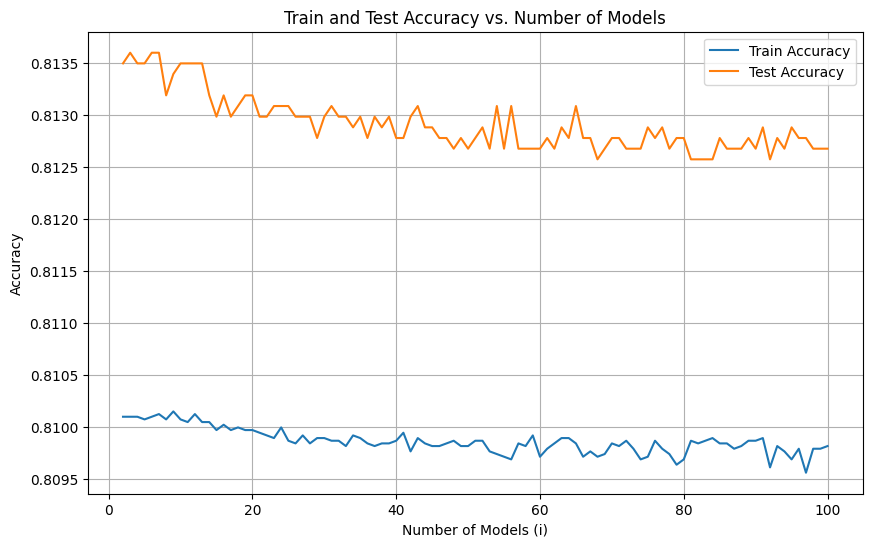

In [30]:
# Your code goes here!

import matplotlib.pyplot as plt

i_range = range(2, 101)

train_accuracies = []
test_accuracies = []

for i in i_range:
    # Split X_train into i parts
    X_train_parts = np.array_split(X_train, i)
    y_train_parts = np.array_split(y_train, i)

    models = []
    for j in range(i):
        model = MyModifiedLogisticRegression()
        model.fit(X_train_parts[j], y_train_parts[j])
        models.append(model)

    ensemble_predictions = adaboost(models, X_test)
    ensemble_predictions_binary = np.where(ensemble_predictions >= 0.5, 1, 0)  # Threshold at 0.5
    test_accuracy = accuracy_score(y_test, ensemble_predictions_binary)
    test_accuracies.append(test_accuracy)

    ensemble_predictions_train = adaboost(models, X_train)
    ensemble_predictions_train_binary = np.where(ensemble_predictions_train >= 0.5, 1, 0)  # Threshold at 0.5
    train_accuracy = accuracy_score(y_train, ensemble_predictions_train_binary)
    train_accuracies.append(train_accuracy)

# Find the value of i with the highest test accuracy
best_i_index = np.argmax(test_accuracies)
best_i = i_range[best_i_index]
best_test_accuracy = test_accuracies[best_i_index]
best_train_accuracy = train_accuracies[best_i_index]

print(f"Best value of i: {best_i}")
print(f"Train accuracy for best i: {best_train_accuracy}")
print(f"Test accuracy for best i: {best_test_accuracy}")

# Plot train and test accuracies against i
plt.figure(figsize=(10, 6))
plt.plot(i_range, train_accuracies, label='Train Accuracy')
plt.plot(i_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Models')
plt.legend()
plt.grid(True)
plt.show()



**Question:** Analyze the results.

**Your Answer:**

As the Number of partial models increases, based on the named database and in this case, accuracy decreases somewhat on both train and test sets.

Note that the fluctuatuions in Test accuracy is higher due to the fact test set on fourth of train set.